# Predicting Air Delays
Notebook I: Intake and Cleaning
----

Thank you for your review of my code notebook.
This notebook's goal is to obtain, modify, clean, and prepare the dataset for exposure on a Machine Learning algorithm.

---
#### Problem Statement: 
Both travelers and airlines find delays frustrating and costly. This project attempts to be able to predict the probability of a commercial flight delay for any flight in the United States. 

---

#### MVP:
My product will be a small lightweight application run on `streamlit` platform for proof-of-concept where a user can find the probability of their desired flight having a delay, how long the delay may be, and how much will the delay cost the user in _lost time_ at the destination 

---
# Intake and Data Cleaning 

The primary challenge in this notebook is managing a large dataset and cleaning data to arrive at something to run preliminary analysis on.  

The notebook is structured as follows.<br> 

>**Notebook I: Intake and Cleaning.**
>1. Imports and set up
>2. Cleaning steps.

The cleaned data will be saved on a new file by the end of this notebook and called into the subsequent notebook EDA for readability.

The notebooks in this project are:<br> 
**I. Intake and cleaning**<br>
II. EDA and preprocessing <br>
III. Modeling and predictions <br>
IV. Streamlit<br>

---


## 1. Set-up
----
I will be making use of `os`, `glob`, and `Amadeus API` libraries for python. 

`os` and `glob` will be used in conjunction with command line commands from the notebook to join the large CSV tables together.



In [1]:
import os 
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


 I have 68 CSV files. Each file represents 1 month of flight history from all U.S. Airports. As a result each CSV is approximatley 150mb in size. Loading a few of them into the workspace of the notebook will result in a loss of data due to data exceeding memory capacity on the local machine. 
 <br>
 <br>
The approach will be to manipulate each of the CSV's and join them directly in the command line. 

Note: 
Files are very very large and will either be hosted for a user's own enjoyment or sampled to a size small enough to go into the repository online. For now, certain code directories 

In [2]:
#expand column view 
pd.set_option('display.max_columns', None)

In [3]:
#change the directory from root to where all the files I will join will be
os.chdir('/Volumes/lacie/data_ingestion/capstone_hopper')

### Data Sources
---
This project attempts gathered delay data from the **Department of Transportation (DOT) Flight Delay reporting Database**. Sadly, there was no public API available to access this data from DOT or from Federal Aviation Administration.

Given there was no way to programatically acquire the desired amount of data, I proceeded to utilize the basic public data library tool and download a CSV for one monthly period at a time.  

This created a lot of _just **too big** files_ and hence our first unanticipated technical challenge with this project; what do I do? 

The plan: use the command line to join all the tables. 
After cleaning see how large the file is. 

To implement this plan, using `glob` methods and direct command line. 


---
References<br>
[Bureau of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.asp?gnoyr_VQ=FGJ)
<br>
[GLOB tutorial](https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/)

### Create new dataset from monthly data sources. 
---
Run the below code if you have access to the files, which are large, on your local machine.

In [4]:
#a list of all the files. a total of 6.958GB of unfiltered raw data. 
!ls

10_nov_20.csv   24_sep_19.csv   38_jul_18.csv   51_jun_17.csv   65_apr_16.csv
11_oct_20.csv   25_aug_19.csv   39_jun_18.csv   52_may_17.csv   66_mar_16.csv
12_sep_20.csv   26_jul_19.csv   3_jun_21.csv    53_apr_17.csv   67_feb_16.csv
13_aug_20.csv   27_jun_19.csv   40_may_18.csv   54_mar_17.csv   68_jan_16.csv
14_jul_20.csv   28_may_19.csv   41_apr_18.csv   55_feb_17.csv   6_mar_21.csv
15_jun_20.csv   29_apr_19.csv   42_mar_18.csv   56_jan_17.csv   7_feb_21.csv
16_may_20.csv   2_jul_21.csv    43_feb_18.csv   57_dec_16.csv   8_jan_21.csv
17_apr_20.csv   30_mar_19.csv   44_jan_18.csv   58_nov_16.csv   9_dec_20.csv
18_mar_20.csv   31_feb_19.csv   45_dec_17.csv   59_oct_16.csv   all_flights.csv
19_feb_20.csv   32_jan_19.csv   46_nov_17.csv   5_apr_21.csv    sample copy.csv
1_aug_21.csv    33_dec_18.csv   47_oct_17.csv   60_sep_16.csv   sample.csv
20_jan_20.csv   34_nov_18.csv   48_sep_17.csv   61_aug_16.csv   sample.csv.zip
21_dec_19.csv   35_oct_18.csv   49_aug_17.csv   62_jul_16.csv
22_n

In [4]:
#using glob, to locate all file names. 
file_ext = '.csv'
files = sorted([file for file in glob.glob(f'*{file_ext}')])

In [5]:
#the first five in the list to confirm 
print('first five files :',files[0:5],
      'last 5 files: ' ,files[-4:])

first five files : ['10_nov_20.csv', '11_oct_20.csv', '12_sep_20.csv', '13_aug_20.csv', '14_jul_20.csv'] last 5 files:  ['6_mar_21.csv', '7_feb_21.csv', '8_jan_21.csv', '9_dec_20.csv']


In [6]:
#using the pd.concat() i will read from a list comprehension to concat each and every csv. 
all_flights = pd.concat([pd.read_csv(file) for file in files ])


/var/folders/fy/0gjwghjd3qxdc86mx10x01rr0000gp/T/ipykernel_1744/3199323081.py:2: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  all_flights = pd.concat([pd.read_csv(file) for file in files ])


#### Save global dataframe to system

In [5]:
#export to csv
#all_flights.to_csv( "all_flights.csv", index=False, encoding='utf-8-sig')

#### Load prior copy of global data from file.

In [4]:
all_flights = pd.read_csv('/Volumes/lacie/data_ingestion/capstone_hopper/all_flights.csv')

/Users/nickvanbergen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Subsetting global dataset 
---
Run this code to build  a new **sample** of the `'all_flights'` dataset. 

In [5]:
all_flights.shape

(34409230, 34)

The process is completed with 34,409,230 flights with 34 _raw_ feature columns. It took approximately 8 minutes to process the file. 

In [6]:
all_flights.head(2)

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE OP_UNIQUE_CARRIER  \
0  2020     11            12            4  2020-11-12                AA   
1  2020     11            13            5  2020-11-13                AA   

  TAIL_NUM  OP_CARRIER_FL_NUM ORIGIN  ORIGIN_CITY_NAME ORIGIN_STATE_NM DEST  \
0   N844NN               1783    PHL  Philadelphia, PA    Pennsylvania  DFW   
1   N339PL               1783    PHL  Philadelphia, PA    Pennsylvania  DFW   

          DEST_CITY_NAME DEST_STATE_NM  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  \
0  Dallas/Fort Worth, TX         Texas          1230    1220.0      -10.0   
1  Dallas/Fort Worth, TX         Texas          1230    1224.0       -6.0   

   DEP_DELAY_NEW  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  ARR_DELAY_NEW  CANCELLED  \
0            0.0          1525    1504.0      -21.0            0.0        0.0   
1            0.0          1525    1524.0       -1.0            0.0        0.0   

  CANCELLATION_CODE  DIVERTED  CRS_ELAPSED_TIME  FLIGHTS  DISTANCE  \
0               NaN       0.0             235.0      1.0    1303.0   
1               NaN       0.0             235.0      1.0    1303.0   

   CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
0            NaN            NaN        NaN             NaN   
1            NaN            NaN        NaN             NaN   

   LATE_AIRCRAFT_DELAY  Unnamed: 33  
0                  NaN          NaN  
1                  NaN          NaN

### Subsetting
---
Lets first look at what an on time arrival is.

>A flight is counted as "on time" if it operated less than 15 minutes later than the scheduled time shown in the carriers' Computerized Reservations Systems (CRS). Arrival performance is based on arrival at the gate. Departure performance is based on departure from the gate.

Right there we can eliminate an `NaN` rows in some of our categories like `'year'`, `'arr_delay'`, `'carrier_delay'`, `'weather_delay'`, `'nas_delay`', `'security_delay'`, `'late_aircraft_delay'`


We should take care to preserve our on-time arrivals and other flights with less than 15 minutes delay that have delay attribution.

From here we can determine how many non null rows that are delays greater than 15 minutes 

---
Source [BTS]('https://www.bts.gov/explore-topics-and-geography/topics/airline-time-performance-and-causes-flight-delays')

In [7]:
all_flights.columns =all_flights.columns.str.lower()

In [8]:
ontime = all_flights[all_flights['arr_delay'] <=0 ]

In [9]:
ontime.shape

(22575180, 34)

There are 22,575,180 flights that were on time in the measurement period. How about delayed flights, and in particular delayed flights with delay attribution entered. 

Delay attribution is where an airline will explain the cause of delay. The _BTS_ has been collecting attributed delay information since 2018. Because our data extends to two years prior, I am anticipating that there will be a significantly smaller subsection of flights with complete flight delay attribution.  

In [10]:
#first section is to subset to all flights with arrival delays greater than 15 minutes.
delayed = all_flights[(all_flights['arr_delay'] >= 15) 
                      & (all_flights['carrier_delay'].notnull()) 
                      & (all_flights['weather_delay'].notnull())
                      & (all_flights['nas_delay'].notnull())
                      & (all_flights['security_delay'].notnull())
                      & (all_flights['late_aircraft_delay'].notnull())
                      ]

In [11]:
#checking to see the annual distribution of flight delays in this subset. 
delayed['year'].value_counts()

2019    1389253
2018    1352710
2017    1029473
2016     964239
2021     636559
2020     431920
Name: year, dtype: int64

In [12]:
delayed.shape

(5804154, 34)

Now that I know our sample size for delayed flights containing delay attribution, I can sample the `ontime` dataset to the exact same size. 

In [13]:
ontime_sample = ontime.sample(n=delayed.shape[0], random_state = 42)

In [14]:
ontime_sample.shape

(5804154, 34)

Next, I take both dataframes and append them together. This will give me a 50% on time and 50% delayed flight balance. And due to the size I will then sample again 

In [15]:
subset = delayed.append(ontime_sample, ignore_index =True)

In [238]:
subset.shape

(11608308, 34)

Now, finally to take a random sampling from these sample subsets for a final testable sample. 

In [305]:
sample = subset.sample(frac=.25, random_state =42)

In [306]:
print(f"Number of sampled flights, {sample.shape[0] :,}")

Number of sampled flights, 2,902,077


#### Adding canceled flights. 
----
Another factor in our analysis will be the impact of canceled flights on our predictive model. 

In [307]:
sample['cancelled'].value_counts()

0.0    2902077
Name: cancelled, dtype: int64

In [308]:
delayed['cancelled'].value_counts()

0.0    5804154
Name: cancelled, dtype: int64

In [309]:
ontime['cancelled'].value_counts()

0.0    22575180
Name: cancelled, dtype: int64

In [310]:
all_flights['cancelled'].value_counts()

0.0    33660330
1.0      748900
Name: cancelled, dtype: int64

Appears to only be 0, not canceled and 1 as canceled. 

Note: the column is spelled 'cancelled' in the data set, and canceled in my text. They are equivalent and only a regional difference in spelling. 

In [278]:
all_flights[all_flights['cancelled'] == 1].head(7)

year  month  day_of_month  day_of_week     fl_date op_unique_carrier  \
1638  2020     11            13            5  2020-11-13                AA   
1937  2020     11            11            3  2020-11-11                AA   
1959  2020     11            11            3  2020-11-11                AA   
2679  2020     11            11            3  2020-11-11                AA   
2742  2020     11            11            3  2020-11-11                AA   
2838  2020     11            12            4  2020-11-12                AA   
2862  2020     11            11            3  2020-11-11                AA   

     tail_num  op_carrier_fl_num origin       origin_city_name  \
1638   N952NN               1895    DFW  Dallas/Fort Worth, TX   
1937   N711UW               1921    MIA              Miami, FL   
1959   N725UW               1923    MIA              Miami, FL   
2679   N997AA               1966    DFW  Dallas/Fort Worth, TX   
2742   N806NN               1970    DFW  Dallas/Fort Worth, TX   
2838   N738US               1977    TPA              Tampa, FL   
2862   N823NN               1978    TPA              Tampa, FL   

     origin_state_nm dest         dest_city_name dest_state_nm  crs_dep_time  \
1638           Texas  SFO      San Francisco, CA    California          1240   
1937         Florida  TPA              Tampa, FL       Florida          2115   
1959         Florida  TPA              Tampa, FL       Florida          1830   
2679           Texas  TPA              Tampa, FL       Florida          1245   
2742           Texas  TPA              Tampa, FL       Florida          1445   
2838         Florida  MIA              Miami, FL       Florida           628   
2862         Florida  DFW  Dallas/Fort Worth, TX         Texas          1217   

      dep_time  dep_delay  dep_delay_new  crs_arr_time  arr_time  arr_delay  \
1638       NaN        NaN            NaN          1441       NaN        NaN   
1937       NaN        NaN            NaN          2216       NaN        NaN   
1959       NaN        NaN            NaN          1930       NaN        NaN   
2679       NaN        NaN            NaN          1607       NaN        NaN   
2742       NaN        NaN            NaN          1805       NaN        NaN   
2838       NaN        NaN            NaN           729       NaN        NaN   
2862       NaN        NaN            NaN          1412       NaN        NaN   

      arr_delay_new  cancelled cancellation_code  diverted  crs_elapsed_time  \
1638            NaN        1.0                 A       0.0             241.0   
1937            NaN        1.0                 B       0.0              61.0   
1959            NaN        1.0                 B       0.0              60.0   
2679            NaN        1.0                 B       0.0             142.0   
2742            NaN        1.0                 B       0.0             140.0   
2838            NaN        1.0                 B       0.0              61.0   
2862            NaN        1.0                 B       0.0             175.0   

      flights  distance  carrier_delay  weather_delay  nas_delay  \
1638      1.0    1464.0            NaN            NaN        NaN   
1937      1.0     204.0            NaN            NaN        NaN   
1959      1.0     204.0            NaN            NaN        NaN   
2679      1.0     929.0            NaN            NaN        NaN   
2742      1.0     929.0            NaN            NaN        NaN   
2838      1.0     204.0            NaN            NaN        NaN   
2862      1.0     929.0            NaN            NaN        NaN   

      security_delay  late_aircraft_delay  unnamed: 33  
1638             NaN                  NaN          NaN  
1937             NaN                  NaN          NaN  
1959             NaN                  NaN          NaN  
2679             NaN                  NaN          NaN  
2742             NaN                  NaN          NaN  
2838             NaN                  NaN         

It is the case that how cancelled flights are recorded, our filtering at the outset necissarily excluded all flight cancellations. Since a canceled flight is a kind of deviation from your itinerary, it would make sense to include the data in our examination. lets take a similar sample and use it in our data. 

In [311]:
#Check the proportion of delayed flights in the population.
all_flights['cancelled'].value_counts(normalize=True)

0.0    0.978235
1.0    0.021765
Name: cancelled, dtype: float64

In [312]:
#get n for the similar proportion of that to our sample data
cx_num = int(0.021765*sample.shape[0])

In [313]:
cx_sample = all_flights[(all_flights['cancelled']==1) & 
                        (all_flights['op_unique_carrier'].notnull()) &
                       (all_flights['tail_num'].notnull())
                       ].sample(n= cx_num, random_state = 42)

In [314]:
cx_sample.shape

(63163, 34)

In [315]:
cx_sample.isnull().sum()

year                       0
month                      0
day_of_month               0
day_of_week                0
fl_date                    0
op_unique_carrier          0
tail_num                   0
op_carrier_fl_num          0
origin                     0
origin_city_name           0
origin_state_nm            0
dest                       0
dest_city_name             0
dest_state_nm              0
crs_dep_time               0
dep_time               61200
dep_delay              61249
dep_delay_new          61249
crs_arr_time               0
arr_time               63163
arr_delay              63163
arr_delay_new          63163
cancelled                  0
cancellation_code          0
diverted                   0
crs_elapsed_time           4
flights                    0
distance                   0
carrier_delay          63163
weather_delay          63163
nas_delay              63163
security_delay         63163
late_aircraft_delay    63163
unnamed: 33            63163
dtype: int64

Having `NaN` values in the arrival and departure columns makes sense since these flights did not operate. Note how they have some flights that had commenced (departed but not necessarily left the origin) while none of the flights have an arrival time. I think that we should keep our new canceled flight cohort and continue on. 

In [316]:
sample = sample.append(cx_sample, ignore_index = True)

#### Save a new sample
----

In [317]:
# save this to CSV for further processing. 
sample.to_csv('sample.csv', index = False)

#### Load existing sample. 
----

In [4]:
#this is to load the dataset if adjustments need to be made. 
sample = pd.read_csv('sample.csv')

## 2. Cleaning
---
Thankfully, the data that came to us from _BTS_ was mostly cleaned and ready to use. However, there are certain categorical columns that need to be adjusted to be human readable in  **EDA** section that follows **cleaning**


### Changing time to categorical labels.
This project will not be conducting a full time series analysis for the purpose of classification. 
For now we will change:
* `month` to human readable months. 
> _12 --> Dec_
* `day_of_the_week` will go from numeric encoding to three-letter abbreviation for days of the week.
> _1 --> Mon_ 
* `op_unique_carrier` will go from two-letter call sign to the regular entity name.
> _AS --> Alaska Airlines_

### Clean: `month`
Month is encoded by the month's number in a calendar year as noted above. 
The following steps decode from number to standard 3-letter abbreviation. 

In [318]:
sample['month'].unique()

array([ 9,  2,  6,  7,  5,  3,  8,  4, 10,  1, 12, 11])

In [319]:
months = {1 : 'Jan', 2: 'Feb', 3 : 'Mar',
         4: 'Apr', 5: 'May', 6: 'Jun',
         7: 'Jul', 8:'Aug', 9 : 'Sep',
         10 : 'Oct', 11:'Nov', 12: 'Dec'}

In [320]:
sample['month'] = sample['month'].apply(lambda x: months[x])
sample['month'].unique()

array(['Sep', 'Feb', 'Jun', 'Jul', 'May', 'Mar', 'Aug', 'Apr', 'Oct',
       'Jan', 'Dec', 'Nov'], dtype=object)

In [321]:
sample.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin',
       'origin_city_name', 'origin_state_nm', 'dest', 'dest_city_name',
       'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay',
       'dep_delay_new', 'crs_arr_time', 'arr_time', 'arr_delay',
       'arr_delay_new', 'cancelled', 'cancellation_code', 'diverted',
       'crs_elapsed_time', 'flights', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'unnamed: 33'],
      dtype='object')

### Clean: `day_of_week`
This column is encoded by the day's number as it falls on the week. 1 = Monday and 7 = Sunday. 
The data dictionary indicates that there is an `unknown` option encoded with `9`. 
I will update the `sample` dataframe to remove all `9` from the frame and then proceed to relabel `day_of_the_week` with a three-letter abbreviation used in the United States as noted above. 

In [322]:
sample = sample[sample['day_of_week'] != 9].copy()

In [323]:
days = { 1: 'Mon', 2: 'Tue', 3:'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

In [324]:
sample['day_of_week'] = sample['day_of_week'].apply(lambda x: days[x])
sample['day_of_week'].unique()

array(['Mon', 'Thu', 'Sun', 'Tue', 'Wed', 'Fri', 'Sat'], dtype=object)

### Clean: `op_unique_carrier`
---
#### Airline specific performance. 
----
Distilling the dataset to its component airlines have already been done for us but the DOT. 
<br>
However we need to get some definitions out of the way here to help us make sense of what we are looking at. 

#### Dealing with subsidiary airlines and codeshare flights. 
---
Since the dawn of deregulation, airlines have been free to form marketing partnerships often advertising another airline's flight and then taking a share of the revenue from the ticket sale. 
<br><br>
For this project, we are only analyzing an operating carrier. That is, an operating carrier is the airline that flies the plane, not the airline (or entity) that sold the ticket. 
<br> <br>
The data comes from BTS in by listing the operating carrier only. This is ideal since each operating carrier has their own personnel that are responsible for the marketing and operation of a particular flight. In other words, we can measure a delay and attribute exact delay times (as required by DOT) on the reason for the delay. 
<br> <br>
Even subsidiary airlines are listed independently of the parent airline since the parent and subsidiary do not share operational control of that particular flight. 
<br><br>
There are more than a few airlines on our dataset that are wholly-owned subsidiary airlines that have their own operational certificate from their aviation governing body. These are indeed separate airlines, however, it is not readily apparent to the average leisure customer. 

First job in this EDA series is to decode the airline designators (two letter designations EG AA = American Airlines, WN = Southwest Airlines) and convert the category column to their commonly know name. 

In [325]:
airlines = {}
for airline in sample['op_unique_carrier'].unique():
    airlines[airline] = 0

In [326]:
airlines

{'MQ': 0,
 'DL': 0,
 'AS': 0,
 'OH': 0,
 'UA': 0,
 'WN': 0,
 'OO': 0,
 'AA': 0,
 'YV': 0,
 'EV': 0,
 'G4': 0,
 'B6': 0,
 'F9': 0,
 'HA': 0,
 'YX': 0,
 'NK': 0,
 '9E': 0,
 'VX': 0,
 'QX': 0}

In [327]:
#grouped in chunks to keep code clean. 1 of 3
airlines['UA'] ='United Airlines'
airlines['9E'] ='Endeavor Air'
airlines['MQ'] ='Envoy Air'
airlines['OO'] ='Skywest Airlines'
airlines['F9'] ='Frontier Airlines'
airlines['DL'] ='Delta Airlines'
airlines['AA'] ='American Airlines'


In [328]:
#group 2 of 3
airlines['OH'] ='PSA Airlines'
airlines['G4'] ='Allegiant Air'
airlines['YV'] ='Mesa Air'
airlines['WN'] ='Southwest Airlines'
airlines['YX'] ='Republic Airways'
airlines['AS'] ='Alaska Airlines'
airlines['EV'] ='ExpressJet'

In [329]:
#group 3 of 3
airlines['B6'] ='JetBlue'
airlines['NK'] ='Spirit Airlines'
airlines['HA'] ='Hawaiian Airlines'
airlines['VX'] ='Virgin America'
airlines['QX'] ='Horizon Air'


In [330]:
airlines

{'MQ': 'Envoy Air',
 'DL': 'Delta Airlines',
 'AS': 'Alaska Airlines',
 'OH': 'PSA Airlines',
 'UA': 'United Airlines',
 'WN': 'Southwest Airlines',
 'OO': 'Skywest Airlines',
 'AA': 'American Airlines',
 'YV': 'Mesa Air',
 'EV': 'ExpressJet',
 'G4': 'Allegiant Air',
 'B6': 'JetBlue',
 'F9': 'Frontier Airlines',
 'HA': 'Hawaiian Airlines',
 'YX': 'Republic Airways',
 'NK': 'Spirit Airlines',
 '9E': 'Endeavor Air',
 'VX': 'Virgin America',
 'QX': 'Horizon Air'}

In [331]:
sample['op_unique_carrier'] = sample['op_unique_carrier'].apply(lambda x: airlines[x])

In [332]:
#rename the column _op_unique_carrier_ to _airline_
sample = sample.rename({'op_unique_carrier': 'airline'}, axis=1)

In [333]:
'airline' in sample.columns

True

In [334]:
# save this to CSV for further processing. 
sample.to_csv('sample.csv', index = False)

#### Clean: Dealing with airlines that no longer operate. 
---
There are 19 airlines and not all of them were in business during the sample period available. 
One such example is Virgin America ('VX'). 

VX was acquired by Alaska Airlines in 2017 and stoped operating under it's callsign in 2018. 
During the merger, many departments and personnel were moved from San Francisco to Seattle where Alaska Airlines is headquartered. 

For the purpose of this analysis, airlines not in operation in 2021 were removed from the airline performance analysis. 

In [335]:
[airline for airline in sample['airline'].unique() if airline not in sample[sample['year']==2021]['airline'].unique()]

['ExpressJet', 'Virgin America']

In [336]:
print(sample[sample['airline']== 'ExpressJet']['year'].value_counts().sum()/sample.shape[0])

0.037819535686824675


In [337]:
print(sample[sample['airline']== 'Virgin America']['year'].value_counts().sum()/sample.shape[0])

0.005240385263924674


In [338]:
sample = sample[sample['airline'] != 'ExpressJet'].copy()

In [339]:
#update sample dataframe
sample = sample[sample['airline'] != 'Virgin America'].copy()

In [340]:
# save this to CSV for further processing. 
sample.to_csv('sample.csv', index = False)

### Clean: Arrival Delays `arr_delay` & `dep_delay`
---
We are using `arr_delay` to measure a flight delay because _DOT_ has already calculated for us the difference between scheduled arrival (`crs_arr_time`) and actual arrival (`arr_time`).
The same method is true for the departure variables as well. `dep_delay`, `dep_time` and `crs_dep_time`.

In the commercial aviation industry, `arr_time` is recorded when the aircraft is parked at the gate with their brakes armed, and main cabin door is open. This is advantageous for us since all late arrivals will have a positive value and all early arrivals a negative value. 

Similarly, on departure the `dep_time` is recorded when the main cabin door is shut, and the brakes are off. 

There are many other timing events that occur during taxi, however we are using the final stopping time as our valid time because this is the time when a passenger is allowed off of the aircraft.

To clean this column, I will bring all early arriving aircraft to 0

In [341]:
sample[['dep_delay','arr_delay']].describe()

dep_delay     arr_delay
count  2.780546e+06  2.779032e+06
mean   2.836040e+01  2.551584e+01
std    6.919183e+01  7.106318e+01
min   -1.140000e+02 -1.060000e+02
25%   -4.000000e+00 -1.200000e+01
50%    1.000000e+00  0.000000e+00
75%    3.800000e+01  3.800000e+01
max    3.890000e+03  3.864000e+03

In [342]:
#adjust negative arrival and departures time (an early arrival) to 0
sample['arr_delay'] = sample['arr_delay'].apply(lambda x: x if x >= 0 else 0)
sample['dep_delay'] =sample['dep_delay'].apply(lambda x: x if x>= 0 else 0)

In [343]:
sample[['dep_delay','arr_delay']].describe()

dep_delay     arr_delay
count  2.837557e+06  2.837557e+06
mean   3.017242e+01  3.160112e+01
std    6.746423e+01  6.675949e+01
min    0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00
75%    3.700000e+01  3.800000e+01
max    3.890000e+03  3.864000e+03

### Clean: Null delay attribution values.
---
These are no problem. They simply represent rows when there was no arrival delay. The fact that they are null is ok because when I go to measure statistics on these columns, a 0 value has influence in terms of averages and deviations etc. 

In [344]:
sample[['year','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']].isnull().sum()

year                         0
arr_delay                    0
carrier_delay          1453957
weather_delay          1453957
nas_delay              1453957
security_delay         1453957
late_aircraft_delay    1453957
dtype: int64

### Clean: Canceled flights.
---
Since we explicitly captured a few canceled flight instances, lets have a look and see if any data needs to be cleaned.

Now that the flights that have been canceled have been added to the data, I need to adjust the values in the `arr_delay` column so that we can resolved the `NaN` issue and limit counting/statistical impact a flight cancellation would have on the measurements in this columns. 

In [347]:
sample.isnull().sum()

year                         0
month                        0
day_of_month                 0
day_of_week                  0
fl_date                      0
airline                      0
tail_num                     0
op_carrier_fl_num            0
origin                       0
origin_city_name             0
origin_state_nm              0
dest                         0
dest_city_name               0
dest_state_nm                0
crs_dep_time                 0
dep_time                 56655
dep_delay                    0
dep_delay_new            57011
crs_arr_time                 0
arr_time                 58525
arr_delay                    0
arr_delay_new            58525
cancelled                    0
cancellation_code      2779032
diverted                     0
crs_elapsed_time             4
flights                      0
distance                     0
carrier_delay          1453957
weather_delay          1453957
nas_delay              1453957
security_delay         1453957
late_air

In [348]:
sample[sample['cancelled']==1][['dep_delay', 'arr_delay']].value_counts()

dep_delay  arr_delay
0.0        0.0          57345
1.0        0.0             24
2.0        0.0             22
4.0        0.0             20
12.0       0.0             20
                        ...  
220.0      0.0              1
218.0      0.0              1
217.0      0.0              1
216.0      0.0              1
1111.0     0.0              1
Length: 300, dtype: int64

This says that if a flight was canceled, they have attributed 0 as the arrival delay.

Because my goal is to build a model that predicts an arrival delay or cancellation, I will set a flag value of -1 in the target variable.

I am continuing and will do the same on the `dep_delay` column as well. 

In [349]:
sample.loc[sample['cancelled'] == 1, 'arr_delay']=-1

In [350]:
sample.loc[sample['cancelled'] == 1, 'dep_delay']=-1

In [351]:
sample[['dep_delay','arr_delay']].describe()

dep_delay     arr_delay
count  2.837557e+06  2.837557e+06
mean   3.011390e+01  3.158049e+01
std    6.742928e+01  6.676940e+01
min   -1.000000e+00 -1.000000e+00
25%    0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00
75%    3.700000e+01  3.800000e+01
max    3.890000e+03  3.864000e+03

In [352]:
sample['cancelled'].value_counts()

0.0    2779032
1.0      58525
Name: cancelled, dtype: int64

In [353]:
# save this to CSV for further processing. 
sample.to_csv('sample.csv', index = False)
#sample = pd.read_csv('sample.csv')

Now we have identified flights that were canceled. lets look at the delay details and see if anything is listed there. 

### Clean: Cancellation Codes
----
In this section we are going to clean the cancellation code column by decoding its original encoding

In [354]:
sample[sample['cancelled'] == 1][['arr_delay','cancellation_code']].value_counts()

arr_delay  cancellation_code
-1.0       B                    26839
           A                    13826
           D                    10137
           C                     7723
dtype: int64

I will decode the cancellation_code column and then encode it with as a OneHotEconding. These will become features at the end.

| **Code**  | **Meaning**  |
|---|:---:|
| _A_  | Air Carrier caused (MX or Crew)  |
| _B_  | Weather (WX) |
| _C_  | National Air System (Air Traffic Control)  |
| _D_  | Security |
| NaN| The flight was not canceled|


BTS definitions for delays and cancelations:

> * Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
>* Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
>* National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
>* Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.
>* Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

Note: the `NaN` condition will remain NaN as it represents a true state. That is, the flight has a null value if the flight was not canceled. 

---
Source [BTS]('https://www.bts.gov/explore-topics-and-geography/topics/airline-time-performance-and-causes-flight-delays')

In [355]:
sample[sample['cancelled'] == 0 ]['cancellation_code'].isnull().sum()

2779032

In [356]:
sample['cancellation_code'] = sample['cancellation_code'].fillna('completed_flight')

In [357]:
#Changing the filled value back to np.nan so we do not impact other metrics. 
cancel_coded = {'A': 'cx_carrier' , 'B': 'cx_weather', 'C': 'cx_nas', 'D': 'cx_security', 'completed_flight' : np.nan}

In [358]:
sample.isnull().sum()

year                         0
month                        0
day_of_month                 0
day_of_week                  0
fl_date                      0
airline                      0
tail_num                     0
op_carrier_fl_num            0
origin                       0
origin_city_name             0
origin_state_nm              0
dest                         0
dest_city_name               0
dest_state_nm                0
crs_dep_time                 0
dep_time                 56655
dep_delay                    0
dep_delay_new            57011
crs_arr_time                 0
arr_time                 58525
arr_delay                    0
arr_delay_new            58525
cancelled                    0
cancellation_code            0
diverted                     0
crs_elapsed_time             4
flights                      0
distance                     0
carrier_delay          1453957
weather_delay          1453957
nas_delay              1453957
security_delay         1453957
late_air

In [359]:
sample['cancellation_code']= sample['cancellation_code'].apply(lambda x: cancel_coded[x])

In [360]:
sample['cancellation_code'].value_counts()

cx_weather     26839
cx_carrier     13826
cx_security    10137
cx_nas          7723
Name: cancellation_code, dtype: int64

In [361]:
# save this to CSV for further processing. 
sample.to_csv('sample.csv', index = False)

### Clean: Diversions
----
A flight diversion is when a flight makes a deviation from its planned arrival and makes another stop. 
Reasons for flight diversions could be severe weather at the destination that is preventing a safe landing procedure. Or, it could also be due to needing to obtain more fuel due to other circumstance (weather) along the flight path. And even still, a flight may divert to deal with a security or medical related emergency.

In all this equates to arriving later than planned so we have to examine if the data should be cleaned.

The data is encoded as 1 meaning the flight was diverted, 0 meaning that the flight was not diverted. 
Our random sample data contains 19,138 flights that were diverted. 

Of these diverted flights only three were canceled, and none suffered an arrival delay. 

Looking at the documentation on the dataset, each delay arrival is counted as a flight. That is, when a flight changes their intended destination, the new destination is recorded and arrival times are recorded from that arrival as opposed to the arrival at the original destination station. 

There is an option to pull down all diversion chains to follow the accumulated arrival delay to the final scheduled destination airport, however, in the interest and scope of this project I did not pull that data down. 

Because this could impact our arrival times by accumulating on-time instances, these rows will be dropped from the data. 

In [362]:
len(sample[sample['diverted']==1])

1

There were one diverted flights in our sample data. Below is how many diversions were recorded in our `all_flights data`.

In [363]:
#are there any properties to be aware of?
all_flights[all_flights['diverted']==1].head()

year  month  day_of_month  day_of_week     fl_date op_unique_carrier  \
511   2020     11            17            2  2020-11-17                AA   
1324  2020     11            13            5  2020-11-13                AA   
5039  2020     11            30            1  2020-11-30                AA   
7172  2020     11            17            2  2020-11-17                AA   
7453  2020     11             7            6  2020-11-07                AA   

     tail_num  op_carrier_fl_num origin       origin_city_name  \
511    N747UW               1820    PHX            Phoenix, AZ   
1324   N918US               1875    LAX        Los Angeles, CA   
5039   N775XF               2126    LGA           New York, NY   
7172   N824AW               2278    DFW  Dallas/Fort Worth, TX   
7453   N102UW               2300    TPA              Tampa, FL   

     origin_state_nm dest  dest_city_name   dest_state_nm  crs_dep_time  \
511          Arizona  RNO        Reno, NV          Nevada          1853   
1324      California  CLT   Charlotte, NC  North Carolina           923   
5039        New York  DCA  Washington, DC        Virginia          1000   
7172           Texas  RNO        Reno, NV          Nevada          1650   
7453         Florida  PHX     Phoenix, AZ         Arizona           603   

      dep_time  dep_delay  dep_delay_new  crs_arr_time  arr_time  arr_delay  \
511     1843.0      -10.0            0.0          2002     839.0        NaN   
1324     918.0       -5.0            0.0          1700    1743.0        NaN   
5039     952.0       -8.0            0.0          1130    1310.0        NaN   
7172    1645.0       -5.0            0.0          1832     833.0        NaN   
7453     552.0      -11.0            0.0           848     951.0        NaN   

      arr_delay_new  cancelled cancellation_code  diverted  crs_elapsed_time  \
511             NaN        0.0               NaN       1.0             129.0   
1324            NaN        0.0               NaN       1.0             277.0   
5039            NaN        0.0               NaN       1.0              90.0   
7172            NaN        0.0               NaN       1.0             222.0   
7453            NaN        0.0               NaN       1.0             285.0   

      flights  distance  carrier_delay  weather_delay  nas_delay  \
511       1.0     601.0            NaN            NaN        NaN   
1324      1.0    2125.0            NaN            NaN        NaN   
5039      1.0     214.0            NaN            NaN        NaN   
7172      1.0    1345.0            NaN            NaN        NaN   
7453      1.0    1788.0            NaN            NaN        NaN   

      security_delay  late_aircraft_delay  unnamed: 33  
511              NaN                  NaN          NaN  
1324             NaN                  NaN          NaN  
5039             NaN                  NaN          NaN  
7172             NaN                  NaN          NaN  
7453             NaN                  NaN          NaN

It seems as though that when `diverted` is marked 1, `arr_time` is counted but not `arr_delay` which is what we have based our screening on. 

In [364]:
#How many flights were diverted?
print(all_flights[all_flights['diverted']==1].shape[0])
#what is the proportion to all other flights?
print(round(all_flights[all_flights['diverted']==1].shape[0]/all_flights.shape[0], 3))

80701
0.002


Looks like approx 0.2% of all flights were diverted. None were captured in our sample. Due to its small representative size I am proceeding without adding diverted flights to our sample. The `sample` dataframe will be updated. 

In [365]:
sample = sample[sample['diverted']!=1]

In [366]:
sample.shape

(2837556, 34)

In [367]:
# save this to CSV for further processing. 
sample.to_csv('sample.csv', index = False)

### Clean: Tail Number
----
The aircraft tailnumber is identical to an automobile's license plate. Each tail number is unique to an aircraft. 
Knowing the tailnumber is good to know if there is a history of delays associated with a particular aircraft. 


I will drop our empty rows from the dataset because information loss is minimal. There are no empty `tail_num` rows due to our explicit calls to the population data. 

In [369]:
sample['tail_num'].isnull().sum() 


0

### Clean: null values
----
Here we have to investigate and handle columns with null values. 

In [370]:
sample.isnull().sum()

year                         0
month                        0
day_of_month                 0
day_of_week                  0
fl_date                      0
airline                      0
tail_num                     0
op_carrier_fl_num            0
origin                       0
origin_city_name             0
origin_state_nm              0
dest                         0
dest_city_name               0
dest_state_nm                0
crs_dep_time                 0
dep_time                 56655
dep_delay                    0
dep_delay_new            57010
crs_arr_time                 0
arr_time                 58524
arr_delay                    0
arr_delay_new            58524
cancelled                    0
cancellation_code      2779032
diverted                     0
crs_elapsed_time             4
flights                      0
distance                     0
carrier_delay          1453956
weather_delay          1453956
nas_delay              1453956
security_delay         1453956
late_air

#### Clean: Null Values- `dep_time`, `dep_delay_new`, `arr_time`, `arr_delay_new`
---
These instances are resulting from a flight being canceled from the schedule as discussed in the prior section. They make sense being in the data set. These are alse columns coded in time. a 0 departure time means midnight. 

The `xxx_new` columns are adjusted columns when the airline makes adjustments to their reported times. These columns will simply be dropped from the dataset. 

We can handle the `dep_time` and `arr_time` columns by adding a -1 in the same fashion we did for `dep_delay` and `arr_delay`

In [371]:
sample.loc[sample['cancelled'] == 1, 'dep_time']=-1

In [372]:
sample.loc[sample['cancelled'] == 1, 'arr_time']=-1

In [373]:
sample = sample.drop(columns=['dep_delay_new','arr_delay_new']).copy()

In [374]:
sample.isnull().sum()

year                         0
month                        0
day_of_month                 0
day_of_week                  0
fl_date                      0
airline                      0
tail_num                     0
op_carrier_fl_num            0
origin                       0
origin_city_name             0
origin_state_nm              0
dest                         0
dest_city_name               0
dest_state_nm                0
crs_dep_time                 0
dep_time                     0
dep_delay                    0
crs_arr_time                 0
arr_time                     0
arr_delay                    0
cancelled                    0
cancellation_code      2779032
diverted                     0
crs_elapsed_time             4
flights                      0
distance                     0
carrier_delay          1453956
weather_delay          1453956
nas_delay              1453956
security_delay         1453956
late_aircraft_delay    1453956
unnamed: 33            2837556
dtype: i

In [375]:
# save this to CSV for further processing. 
sample.to_csv('sample.csv', index = False)

#### Clean: Null Values- `cancellation_code`
----
This appears to be null where the flight was successfully completed. 

In [377]:
#rows with null values
not_codes = sample[sample['cancellation_code'].isnull()].shape[0]
not_codes

2779032

In [378]:
codes = sample[sample['cancellation_code'].notnull()].shape[0]
codes

58524

In [379]:
not_codes + codes == sample.shape[0]

True

### Clean: Drop unused columns and save a copy.
---
Although these columns contain parts-of, or encodings-for, other columns they will remain in the dataset for our application to make use of. However these are not going to be considered features in our model. I will set up a `drop_cols` variable and drop them from the current sampled data frame. 


In [380]:
sample.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'airline',
       'tail_num', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm',
       'crs_dep_time', 'dep_time', 'dep_delay', 'crs_arr_time', 'arr_time',
       'arr_delay', 'cancelled', 'cancellation_code', 'diverted',
       'crs_elapsed_time', 'flights', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'unnamed: 33'],
      dtype='object')

Columns kept
* Date related columns: <br>
    `'year'`, `'month'`, `'day_of_month'`, `'day_of_week'`, and `'fl_date'`

* Airline and aircraft information: <br>
    `airline`, `tail_num`

* Flight itinerary information:<br>
    `op_carrier_fl_num`, `'origin'`, `'origin_city_name'`, `'dest'`, `'dest_city_name'`, `'distance'`
    
* Flight schedule and time performance information:<br>
    Departures: `'crs_dep_time'`, `'dep_time'`, `'dep_delay'`<br>
    Arrivals: `'crs_arr_time'`, `'arr_time'`, `'arr_delay'`<br>
    
* Flight Deviation:<br>
    `cancelled` and `cancellation code`
    

The following columns are being dropped and the reason given. 

* `origin_state_nm`, redundant information with `'origin_city_nm'` 
* `dest_state_nm`, same as above. 
* `dep_delay_new`, `arr_delay_new`, These columns represent data that has been updated by the carrier post-hoc. Due to the timing of the updates, we still want to watch for on-the-ground truths so these updated events will be dropped and the original occurrence of the delay is kept. 
* `crs_elapsed_time`, this is the gate to gate timing of a given flight based on the _Customer Reservation System_ (CRS) information. This is the total scheduled flight time a flight has on the schedule. 
* `flights`, this column represented the number of flights on a flight number. This is used in the event of a _through flight_. There were no instances of through flights in our global population sample. 
> A _through flight_ is a single marketed flight that has a stop in the middle. EG flight American Airlines **9987** is sold as LAX to JFK as a throughflight with a stop in Dallas (DFW). Dallas customers also purchase American Airlines flight **9987** but to them it is from DFW to JFK. The flight column in this instance would be 2 since the same aircraft is used on the single scheduled flight. 
* `unnamed: 33`, a superfluous column included in the original download.   
* `'diverted'`, there are no instances of diverted flights in our sample.  

In [381]:
sample = sample.drop(columns = ['origin_state_nm',
                                      'dest_state_nm',
                                      'crs_elapsed_time',
                                      'flights',
                                      'diverted',
                                      'unnamed: 33']).copy()

In [382]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837556 entries, 0 to 2965239
Data columns (total 26 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                object 
 2   day_of_month         int64  
 3   day_of_week          object 
 4   fl_date              object 
 5   airline              object 
 6   tail_num             object 
 7   op_carrier_fl_num    int64  
 8   origin               object 
 9   origin_city_name     object 
 10  dest                 object 
 11  dest_city_name       object 
 12  crs_dep_time         int64  
 13  dep_time             float64
 14  dep_delay            float64
 15  crs_arr_time         int64  
 16  arr_time             float64
 17  arr_delay            float64
 18  cancelled            float64
 19  cancellation_code    object 
 20  distance             float64
 21  carrier_delay        float64
 22  weather_delay        float64
 23  nas_delay            float64
 24

# Save prepared data copy
---
Now that our data is prepared, I will save a final copy of our sample data. 

In [392]:
#save copy of cleaned sample dataframe
sample.to_csv('sample_cleaned.csv', index = False)

## Correlation investigation
---
Correlations are presented after feature engineering primarily because I have some domain knowledge in the industry. Correlations here are problematic across many columns due to _data leakage_. Nevertheless, correlation tables are reported below on the full sample and then on the `delayed` subset.

In [706]:
#correlations. 
sample_model['fl_date'] = pd.to_datetime(sample_model['fl_date'])

In [786]:
#the same applied to delayed
delayed['cl_on_time'] = delayed['arr_delay'].apply(lambda x: 1 if x == 0 else 0)

In [758]:
sample_model.isnull().sum()

year                         0
month                        0
day_of_month                 0
day_of_week                  0
fl_date                      0
airline                      0
tail_num                 55319
origin                       0
origin_city_name             0
dest                         0
dest_city_name               0
crs_dep_time                 0
dep_time                173800
dep_delay               175056
crs_arr_time                 0
arr_time                180298
arr_delay                    0
cancelled                    0
cancellation_code      8079963
diverted                     0
distance                     0
carrier_delay          6874848
weather_delay          6874848
nas_delay              6874848
security_delay         6874848
late_aircraft_delay    6874848
cl_nominal_delay             0
cl_sm_delay                  0
cl_mod_delay                 0
cl_lg_delay                  0
cl_xl_delay                  0
cl_xtreme_delay              0
cl_on_ti

In [767]:
sample_model[sample_model['dep_time'].isnull()]['cancelled'].count()

173800

In [753]:
cols = sample_model.describe().columns.to_list()

In [754]:
cols

['year',
 'day_of_month',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'diverted',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'cl_nominal_delay',
 'cl_sm_delay',
 'cl_mod_delay',
 'cl_lg_delay',
 'cl_xl_delay',
 'cl_xtreme_delay',
 'cl_on_time']

In [781]:
sample_rho = sample_model[cols].corr()

In [787]:
delayed_rho = delayed[cols].corr()

In [782]:
sample_rho

year  day_of_month  crs_dep_time  dep_time  \
year                 1.000000     -0.000070     -0.008395 -0.009547   
day_of_month        -0.000070      1.000000     -0.000626 -0.001005   
crs_dep_time        -0.008395     -0.000626      1.000000  0.960453   
dep_time            -0.009547     -0.001005      0.960453  1.000000   
dep_delay           -0.018667     -0.002778      0.095388  0.129477   
crs_arr_time         0.005457     -0.002084      0.688587  0.691186   
arr_time             0.005652     -0.002218      0.615207  0.636387   
arr_delay           -0.013630     -0.003552      0.077038  0.109983   
cancelled            0.058657      0.006363      0.008664  0.007215   
diverted            -0.000250     -0.000660      0.002007  0.003708   
distance            -0.046967      0.001821     -0.011957 -0.017976   
carrier_delay        0.035819     -0.000768     -0.063054 -0.048870   
weather_delay        0.025063     -0.005122      0.001752 -0.015189   
nas_delay           -0.018493     -0.004047     -0.052917 -0.033463   
security_delay       0.011055     -0.001613     -0.004779 -0.002829   
late_aircraft_delay -0.007567     -0.002428      0.125288  0.142028   
cl_nominal_delay    -0.033731      0.000674      0.015172  0.015004   
cl_sm_delay         -0.029049     -0.000779      0.089646  0.108954   
cl_mod_delay        -0.013531     -0.002374      0.071980  0.100731   
cl_lg_delay         -0.007196     -0.002005      0.040002  0.063103   
cl_xl_delay         -0.002802     -0.001790      0.019076  0.038557   
cl_xtreme_delay      0.001515     -0.001790      0.004792  0.021584   
cl_on_time           0.052679      0.001884     -0.111644 -0.146559   

                     dep_delay  crs_arr_time  arr_time  arr_delay  cancelled  \
year                 -0.018667      0.005457  0.005652  -0.013630   0.058657   
day_of_month         -0.002778     -0.002084 -0.002218  -0.003552   0.006363   
crs_dep_time          0.095388      0.688587  0.615207   0.077038   0.008664   
dep_time              0.129477      0.691186  0.636387   0.109983   0.007215   
dep_delay             1.000000      0.078960  0.021494   0.965272   0.026074   
crs_arr_time          0.078960      1.000000  0.854825   0.066230   0.004715   
arr_time              0.021494      0.854825  1.000000   0.014206        NaN   
arr_delay             0.965272      0.066230  0.014206   1.000000  -0.041807   
cancelled             0.026074      0.004715       NaN  -0.041807   1.000000   
diverted              0.019384      0.006835  0.003629  -0.013585  -0.007097   
distance              0.016656      0.018224  0.009503   0.007794  -0.024067   
carrier_delay         0.655854     -0.059104 -0.065584   0.650182        NaN   
weather_delay         0.299758      0.002441 -0.021355   0.313108        NaN   
nas_delay             0.140376     -0.002191  0.006792   0.246787        NaN   
security_delay        0.019898     -0.004280 -0.004875   0.017994        NaN   
late_aircraft_delay   0.519505      0.088206 -0.029836   0.493754        NaN   
cl_nominal_delay     -0.041273      0.014854  0.027435  -0.053306  -0.064079   
cl_sm_delay           0.145541      0.074599  0.070352   0.162915  -0.051516   
cl_mod_delay          0.304025      0.060063  0.032201   0.320627  -0.027392   
cl_lg_delay           0.329473      0.035112  0.001853   0.342243  -0.015883   
cl_xl_delay           0.306461      0.018814 -0.008106   0.316206  -0.010098   
cl_xtreme_delay       0.645009      0.006062 -0.017519   0.663968  -0.010332   
cl_on_time           -0.398371     -0.095859 -0.077500  -0.412116   0.101444   

                     diverted  ...  nas_delay  security_delay  \
year                -0.000250  ...  -0.018493        0.011055   
day_of_month        -0.000660  ...  -0.004047       -0.001613   
crs_dep_time         0.002007  ...  -0.052917       -0.004779   
dep_time             0.003708  ...  -0.033463       -0.002829   
dep_delay            0.019384  ...   0.140376        0.019898   
crs_arr_t

In [788]:
delayed_rho

year  day_of_month  crs_dep_time  dep_time  \
year                 1.000000     -0.001970     -0.019421 -0.014541   
day_of_month        -0.001970      1.000000      0.002373  0.000974   
crs_dep_time        -0.019421      0.002373      1.000000  0.888783   
dep_time            -0.014541      0.000974      0.888783  1.000000   
dep_delay            0.013020     -0.004411      0.088457  0.124104   
crs_arr_time        -0.005382     -0.002460      0.639018  0.645494   
arr_time            -0.000223     -0.002643      0.380484  0.444790   
arr_delay            0.015973     -0.005449      0.061909  0.095451   
cancelled                 NaN           NaN           NaN       NaN   
diverted                  NaN           NaN           NaN       NaN   
distance            -0.030722     -0.000256     -0.035518 -0.057013   
carrier_delay        0.035819     -0.000768     -0.063054 -0.048870   
weather_delay        0.025063     -0.005122      0.001752 -0.015189   
nas_delay           -0.018493     -0.004047     -0.052917 -0.033463   
security_delay       0.011055     -0.001613     -0.004779 -0.002829   
late_aircraft_delay -0.007567     -0.002428      0.125288  0.142028   
cl_nominal_delay    -0.001057      0.004300     -0.129801 -0.173783   
cl_sm_delay         -0.004803      0.000368      0.069537  0.070476   
cl_mod_delay         0.001297     -0.003465      0.078988  0.111231   
cl_lg_delay          0.001919     -0.003097      0.041455  0.071202   
cl_xl_delay          0.004419     -0.002881      0.014550  0.042198   
cl_xtreme_delay      0.012457     -0.002874     -0.012022  0.011819   
cl_on_time                NaN           NaN           NaN       NaN   

                     dep_delay  crs_arr_time  arr_time  arr_delay  cancelled  \
year                  0.013020     -0.005382 -0.000223   0.015973        NaN   
day_of_month         -0.004411     -0.002460 -0.002643  -0.005449        NaN   
crs_dep_time          0.088457      0.639018  0.380484   0.061909        NaN   
dep_time              0.124104      0.645494  0.444790   0.095451        NaN   
dep_delay             1.000000      0.066076 -0.025318   0.971881        NaN   
crs_arr_time          0.066076      1.000000  0.683386   0.051554        NaN   
arr_time             -0.025318      0.683386  1.000000  -0.030937        NaN   
arr_delay             0.971881      0.051554 -0.030937   1.000000        NaN   
cancelled                  NaN           NaN       NaN        NaN        NaN   
diverted                   NaN           NaN       NaN        NaN        NaN   
distance             -0.006113      0.001047 -0.021717  -0.004935        NaN   
carrier_delay         0.655854     -0.059104 -0.065584   0.650182        NaN   
weather_delay         0.299758      0.002441 -0.021355   0.313108        NaN   
nas_delay             0.140376     -0.002191  0.006792   0.246787        NaN   
security_delay        0.019898     -0.004280 -0.004875   0.017994        NaN   
late_aircraft_delay   0.519505      0.088206 -0.029836   0.493754        NaN   
cl_nominal_delay     -0.415696     -0.103609 -0.044101  -0.444017        NaN   
cl_sm_delay          -0.071771      0.052884  0.057905  -0.059075        NaN   
cl_mod_delay          0.226025      0.062393  0.018939   0.238632        NaN   
cl_lg_delay           0.299234      0.035776 -0.016590   0.308611        NaN   
cl_xl_delay           0.296596      0.016379 -0.025431   0.303533        NaN   
cl_xtreme_delay       0.671805     -0.006539 -0.040895   0.686230        NaN   
cl_on_time                 NaN           NaN       NaN        NaN        NaN   

                     diverted  ...  nas_delay  security_delay  \
year                      NaN  ...  -0.018493        0.011055   
day_of_month              NaN  ...  -0.004047       -0.001613   
crs_dep_time              NaN  ...  -0.052917       -0.004779   
dep_time                  NaN  ...  -0.033463       -0.002829   
dep_delay                 NaN  ...   0.140376        0.019898   
crs_arr_t

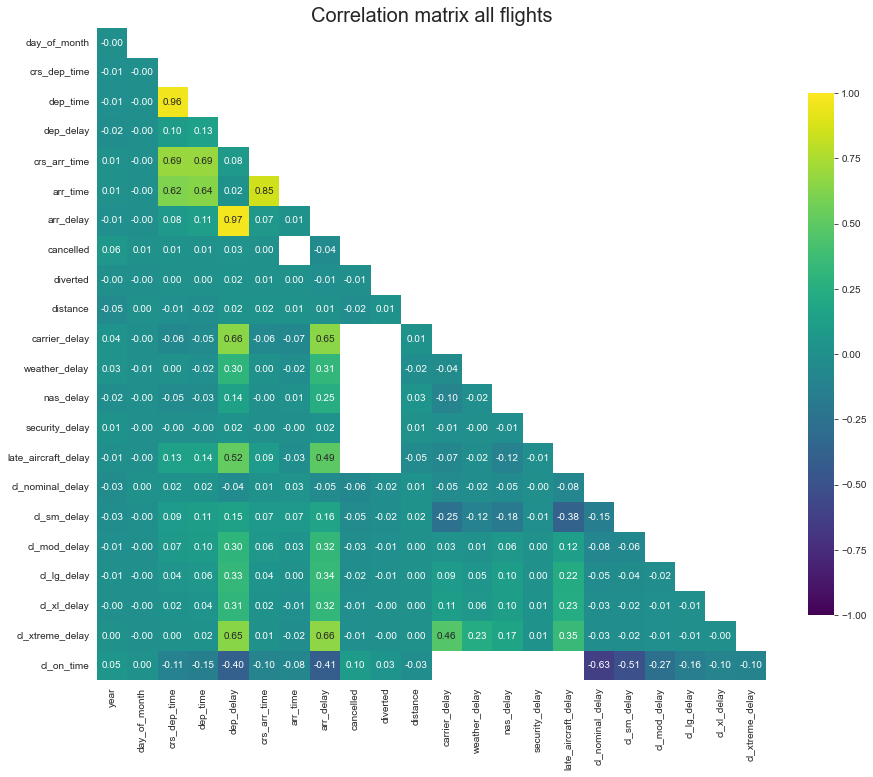

In [791]:
#init mask
mask =np.triu(np.ones_like(sample_rho, dtype =np.bool_))
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15,12))
#mask adjustment
mask = mask[1:, :-1]
corr = delay_rho.iloc[1:, :-1].copy()
#heatmap
sns.heatmap(corr, mask =mask, annot = True, fmt= ".2f", cmap = 'viridis', vmin = -1, vmax= 1, cbar_kws={"shrink": .8})
plt.title('Correlation matrix all flights', size = 20)
plt.show()

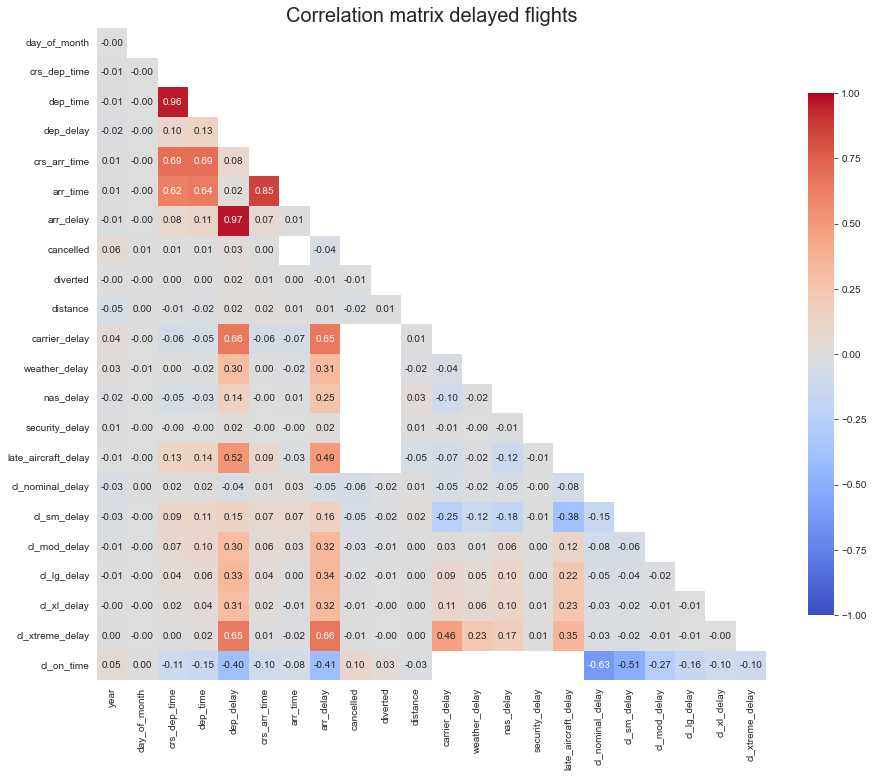

In [792]:
#init mask
mask =np.triu(np.ones_like(delayed_rho, dtype =np.bool_))
sns.set_style('white')
fig, ax = plt.subplots(figsize = (15,12))
#mask adjustment
mask = mask[1:, :-1]
corr = delay_rho.iloc[1:, :-1].copy()
#heatmap
sns.heatmap(corr, mask =mask, annot = True, fmt= ".2f", cmap = 'coolwarm', vmin = -1, vmax= 1, cbar_kws={"shrink": .8})
plt.title('Correlation matrix delayed flights', size = 20)
plt.show()

##### Discussion:
----
There are many columns that are problematic or that will require further explanation. 

In [793]:
sample_model.to_csv('Xsample.csv', index = False)
delayed.to_csv('testingframe.csv', index = False)